In [313]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [314]:
Loandata=pd.read_csv('loan approval data.csv')
Loandata

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard,PRE_1,PGR_1
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0.000232,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.000056,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.000008,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.101875,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.007113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,0.001311,0
4996,4997,30,4,15,92037,4,0.4,1,1,0,0,0,1,0,0.000033,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,0.002266,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,0.008856,0


In [315]:
Loandata.shape

(5000, 16)

In [316]:
Loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  PRE_1               5000 non-null   float64
 15  PGR_1               5000 non-null   int64  
dtypes: flo

In [317]:
Loandata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
PRE_1                 0
PGR_1                 0
dtype: int64

In [318]:
Loandata.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard,PRE_1,PGR_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,0.307600,0.096000,0.104400,0.06040,0.596800,0.294000,0.096000,0.074400
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,0.461546,0.294621,0.305809,0.23825,0.490589,0.455637,0.231097,0.262447
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000001,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000663,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.004943,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.040710,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999904,1.000000


In [319]:
Loandata.drop(columns=['PRE_1','PGR_1'],inplace=True)
Loandata.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [320]:
Ageskew= Loandata['Age'].skew()
Expskew=Loandata['Experience'].skew()
Incskew=Loandata['Income'].skew()
zipskew=Loandata['ZIP.Code'].skew()
Famskew=Loandata['Family'].skew()
CCskew=Loandata['CCAvg'].skew()
Eduskew=Loandata['Education'].skew()
Mortskew=Loandata['Mortgage'].skew()
PLskew=Loandata['Personal.Loan'].skew()
SAskew=Loandata['Securities.Account'].skew()
Onlineskew=Loandata['Online'].skew()
creditskew=Loandata['CreditCard'].skew()

print(f'Skewness of Age: {Ageskew}')
print(f'Skewness of Experience : {Expskew}')
print(f'Skewness of Income: {Incskew}')
print(f'Skewness of ZIP.Code: {zipskew}')
print(f'Skewness of Family: {Famskew}')
print(f'Skewness of CCAvg: {CCskew}')
print(f'Skewness of Education: {Eduskew}')
print(f'Skewness of Mortgage: {Mortskew}')
print(f'Skewness of Personal.Loan: {PLskew}')
print(f'Skewness of SecurityAccount: {SAskew}')
print(f'Skewness of Online: {Onlineskew}')
print(f'Skewness of CreditCard: {creditskew}')

Skewness of Age: -0.02934068151284029
Skewness of Experience : -0.026324688402384513
Skewness of Income: 0.8413386072610816
Skewness of ZIP.Code: -12.500221098132892
Skewness of Family: 0.15522066944367582
Skewness of CCAvg: 1.5984433366678663
Skewness of Education: 0.22709331566088503
Skewness of Mortgage: 0.8340530732520982
Skewness of Personal.Loan: 2.743606655894059
Skewness of SecurityAccount: 2.588268372959341
Skewness of Online: -0.3947853269234487
Skewness of CreditCard: 0.9045894514231758


C:\Users\Tanu Maskare\AppData\Local\Temp\ipykernel_191716\2311002037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loandata['Age'],ax=ax[0,0])
C:\Users\Tanu Maskare\AppData\Local\Temp\ipykernel_191716\2311002037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loandata['Experience'],ax=

[]

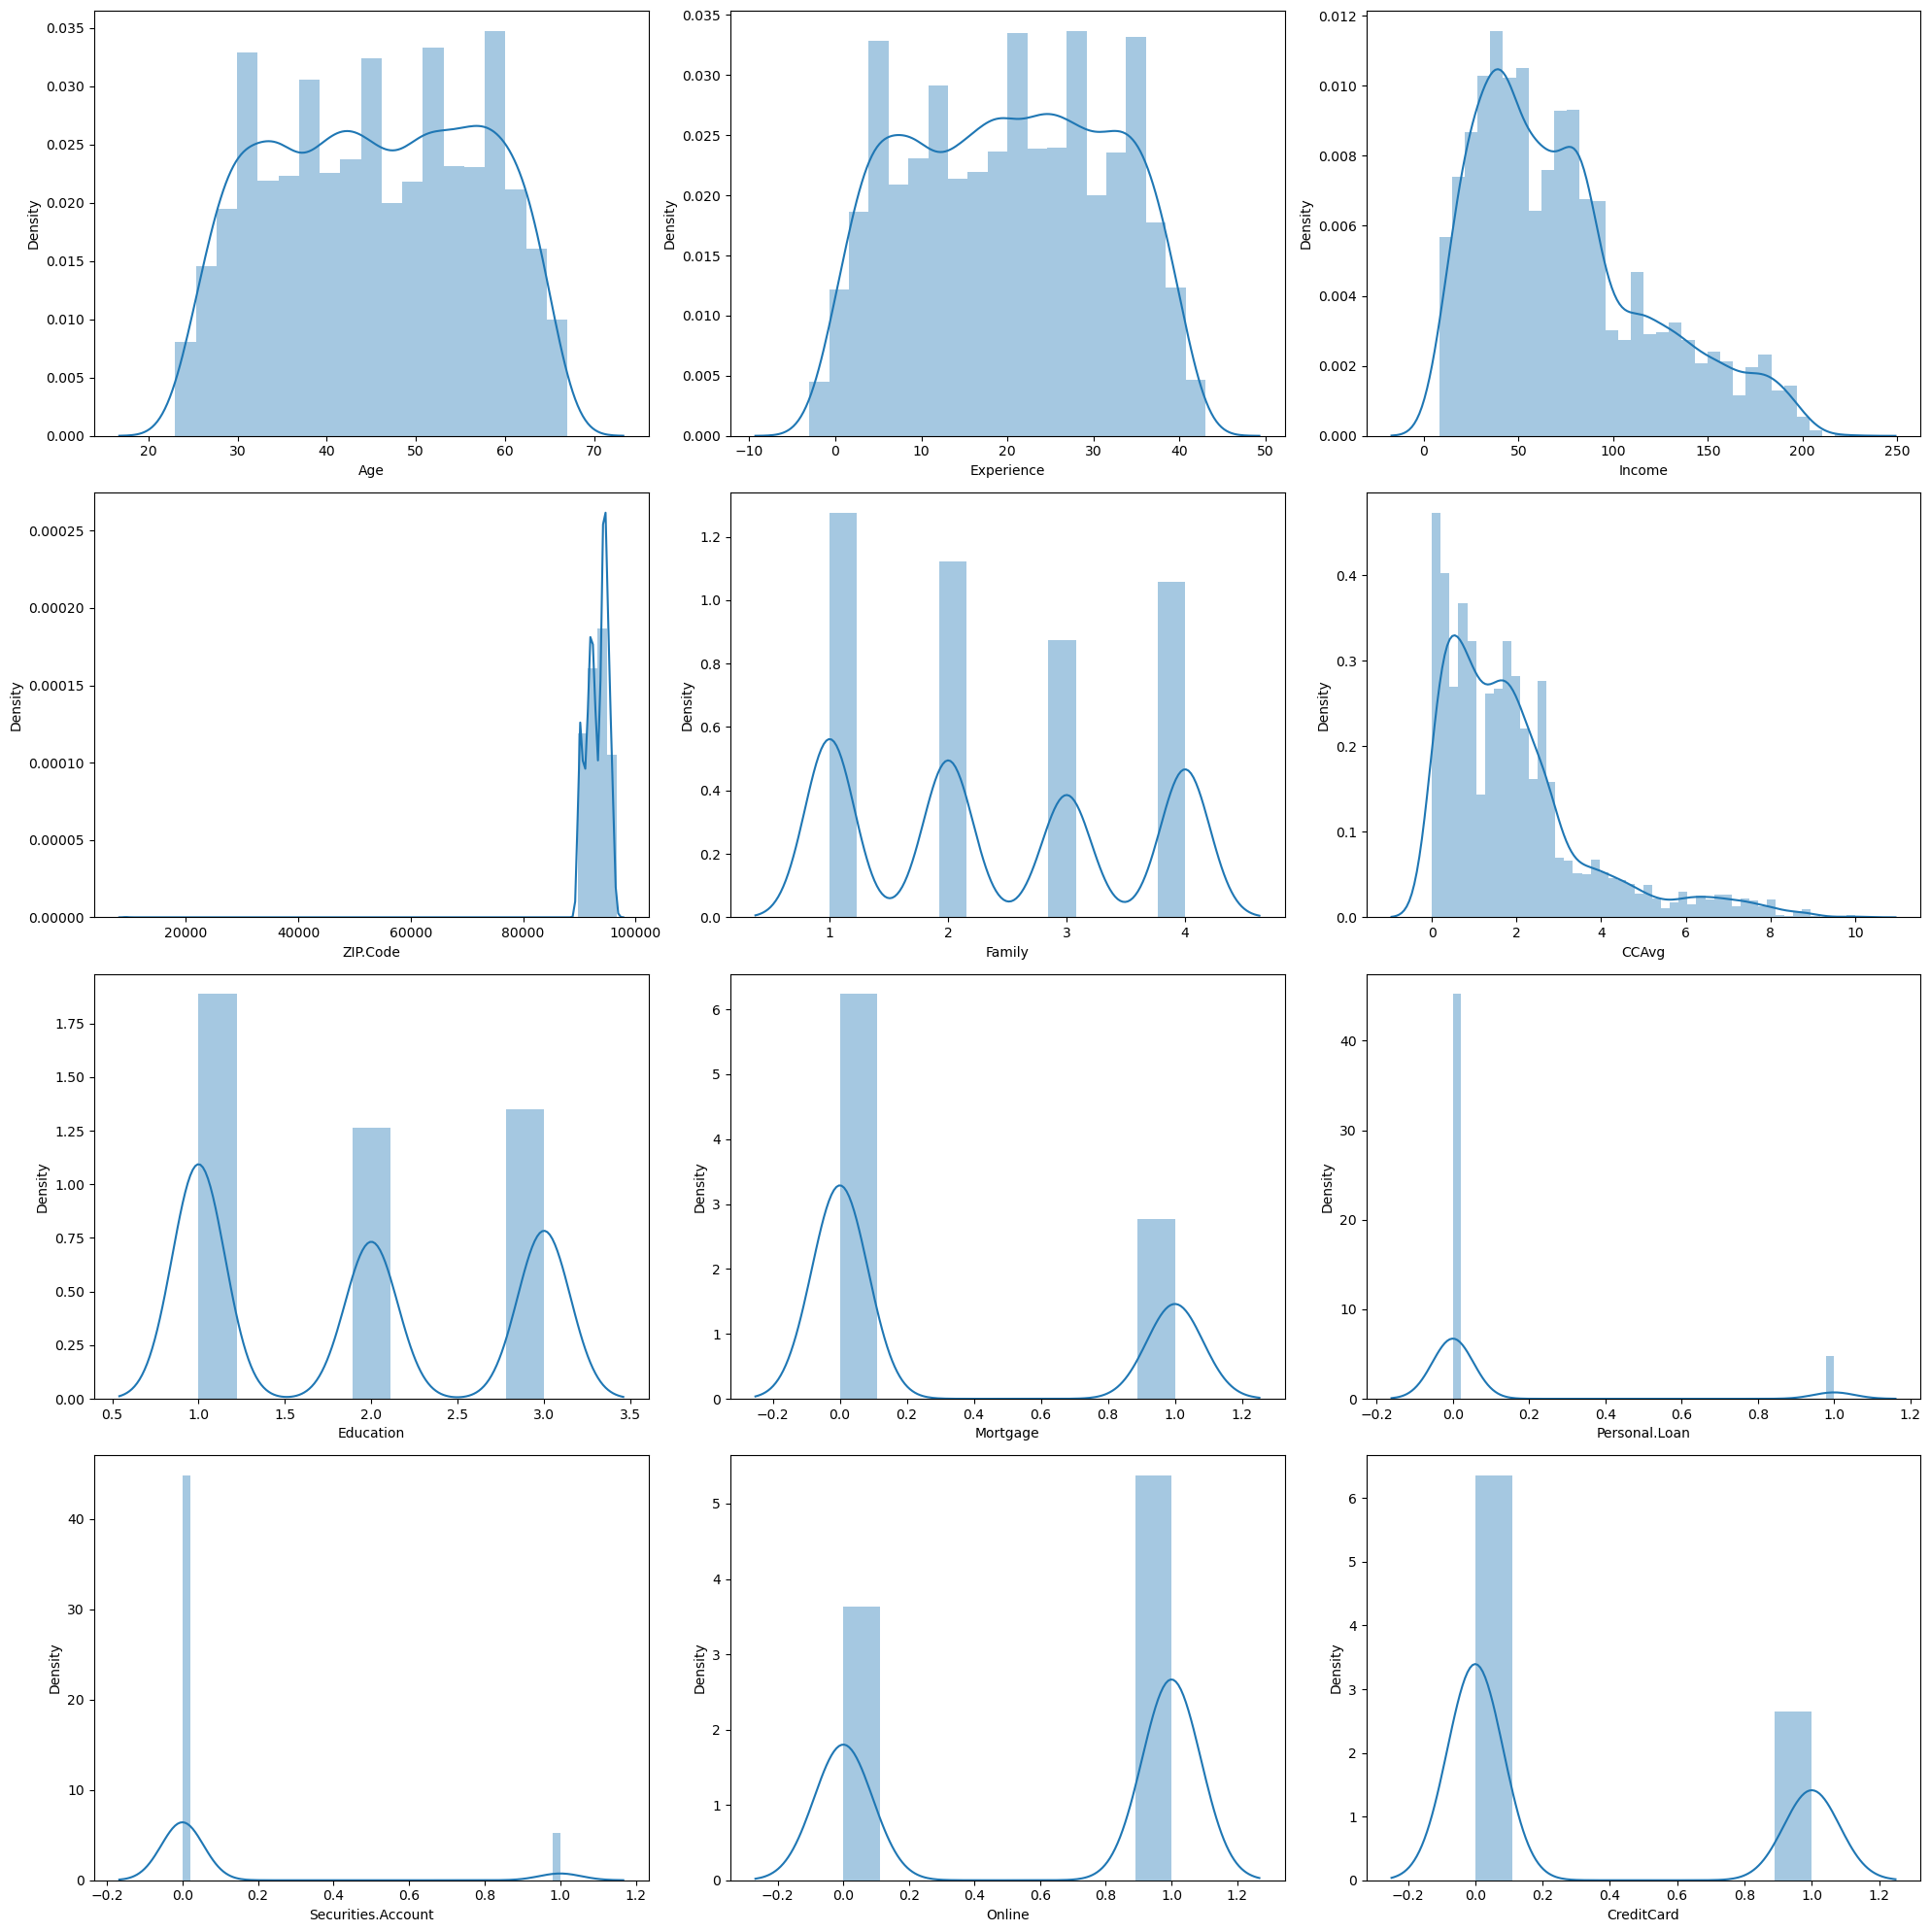

In [321]:
fig, ax=plt.subplots(4,3,figsize=(20,20))
sns.distplot(Loandata['Age'],ax=ax[0,0])
sns.distplot(Loandata['Experience'],ax=ax[0,1])
sns.distplot(Loandata['Income'],ax=ax[0,2])
sns.distplot(Loandata['ZIP.Code'],ax=ax[1,0])
sns.distplot(Loandata['Family'],ax=ax[1,1])
sns.distplot(Loandata['CCAvg'],ax=ax[1,2])
sns.distplot(Loandata['Education'],ax=ax[2,0])
sns.distplot(Loandata['Mortgage'],ax=ax[2,1])
sns.distplot(Loandata['Personal.Loan'],ax=ax[2,2])
sns.distplot(Loandata['Securities.Account'],ax=ax[3,0])
sns.distplot(Loandata['Online'],ax=ax[3,1])
sns.distplot(Loandata['CreditCard'],ax=ax[3,2])
plt.tight_layout()
plt.plot()

In [322]:
Scaler=StandardScaler()
Loandata['Age_norm']=Scaler.fit_transform(Loandata[['Age']])
Loandata['Experience_norm']=Scaler.fit_transform(Loandata[["Experience"]])
Loandata['Income_log'] = np.log1p(Loandata['Income'])
Loandata['CCAvg_log']=np.log1p(Loandata[["CCAvg"]])

print('Age_normalized:',Loandata[['Age_norm']])
print('Experience_normalized:',Loandata[['Experience_norm']])
print('Income_normalized:',Loandata[['Income_log']])
print('CCAvg_normalized:',Loandata[['CCAvg_log']])


Age_normalized:       Age_norm
0    -1.774417
1    -0.029524
2    -0.552992
3    -0.901970
4    -0.901970
...        ...
4995 -1.425438
4996 -1.338194
4997  1.540880
4998  1.715370
4999 -1.512683

[5000 rows x 1 columns]
Experience_normalized:       Experience_norm
0           -1.666078
1           -0.096330
2           -0.445163
3           -0.968413
4           -1.055621
...               ...
4995        -1.491662
4996        -1.404454
4997         1.647835
4998         1.735043
4999        -1.404454

[5000 rows x 1 columns]
Income_normalized:       Income_log
0       3.912023
1       3.555348
2       2.484907
3       4.615121
4       3.828641
...          ...
4995    3.713572
4996    2.772589
4997    3.218876
4998    3.912023
4999    4.430817

[5000 rows x 1 columns]
CCAvg_normalized:       CCAvg_log
0      0.955511
1      0.916291
2      0.693147
3      1.308333
4      0.693147
...         ...
4995   1.064711
4996   0.336472
4997   0.262364
4998   0.405465
4999   0.587787

[5000 ro

C:\Users\Tanu Maskare\AppData\Local\Temp\ipykernel_191716\766898182.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loandata['Age'],ax=ax[0,0])
C:\Users\Tanu Maskare\AppData\Local\Temp\ipykernel_191716\766898182.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loandata['Experience'],ax=ax

[]

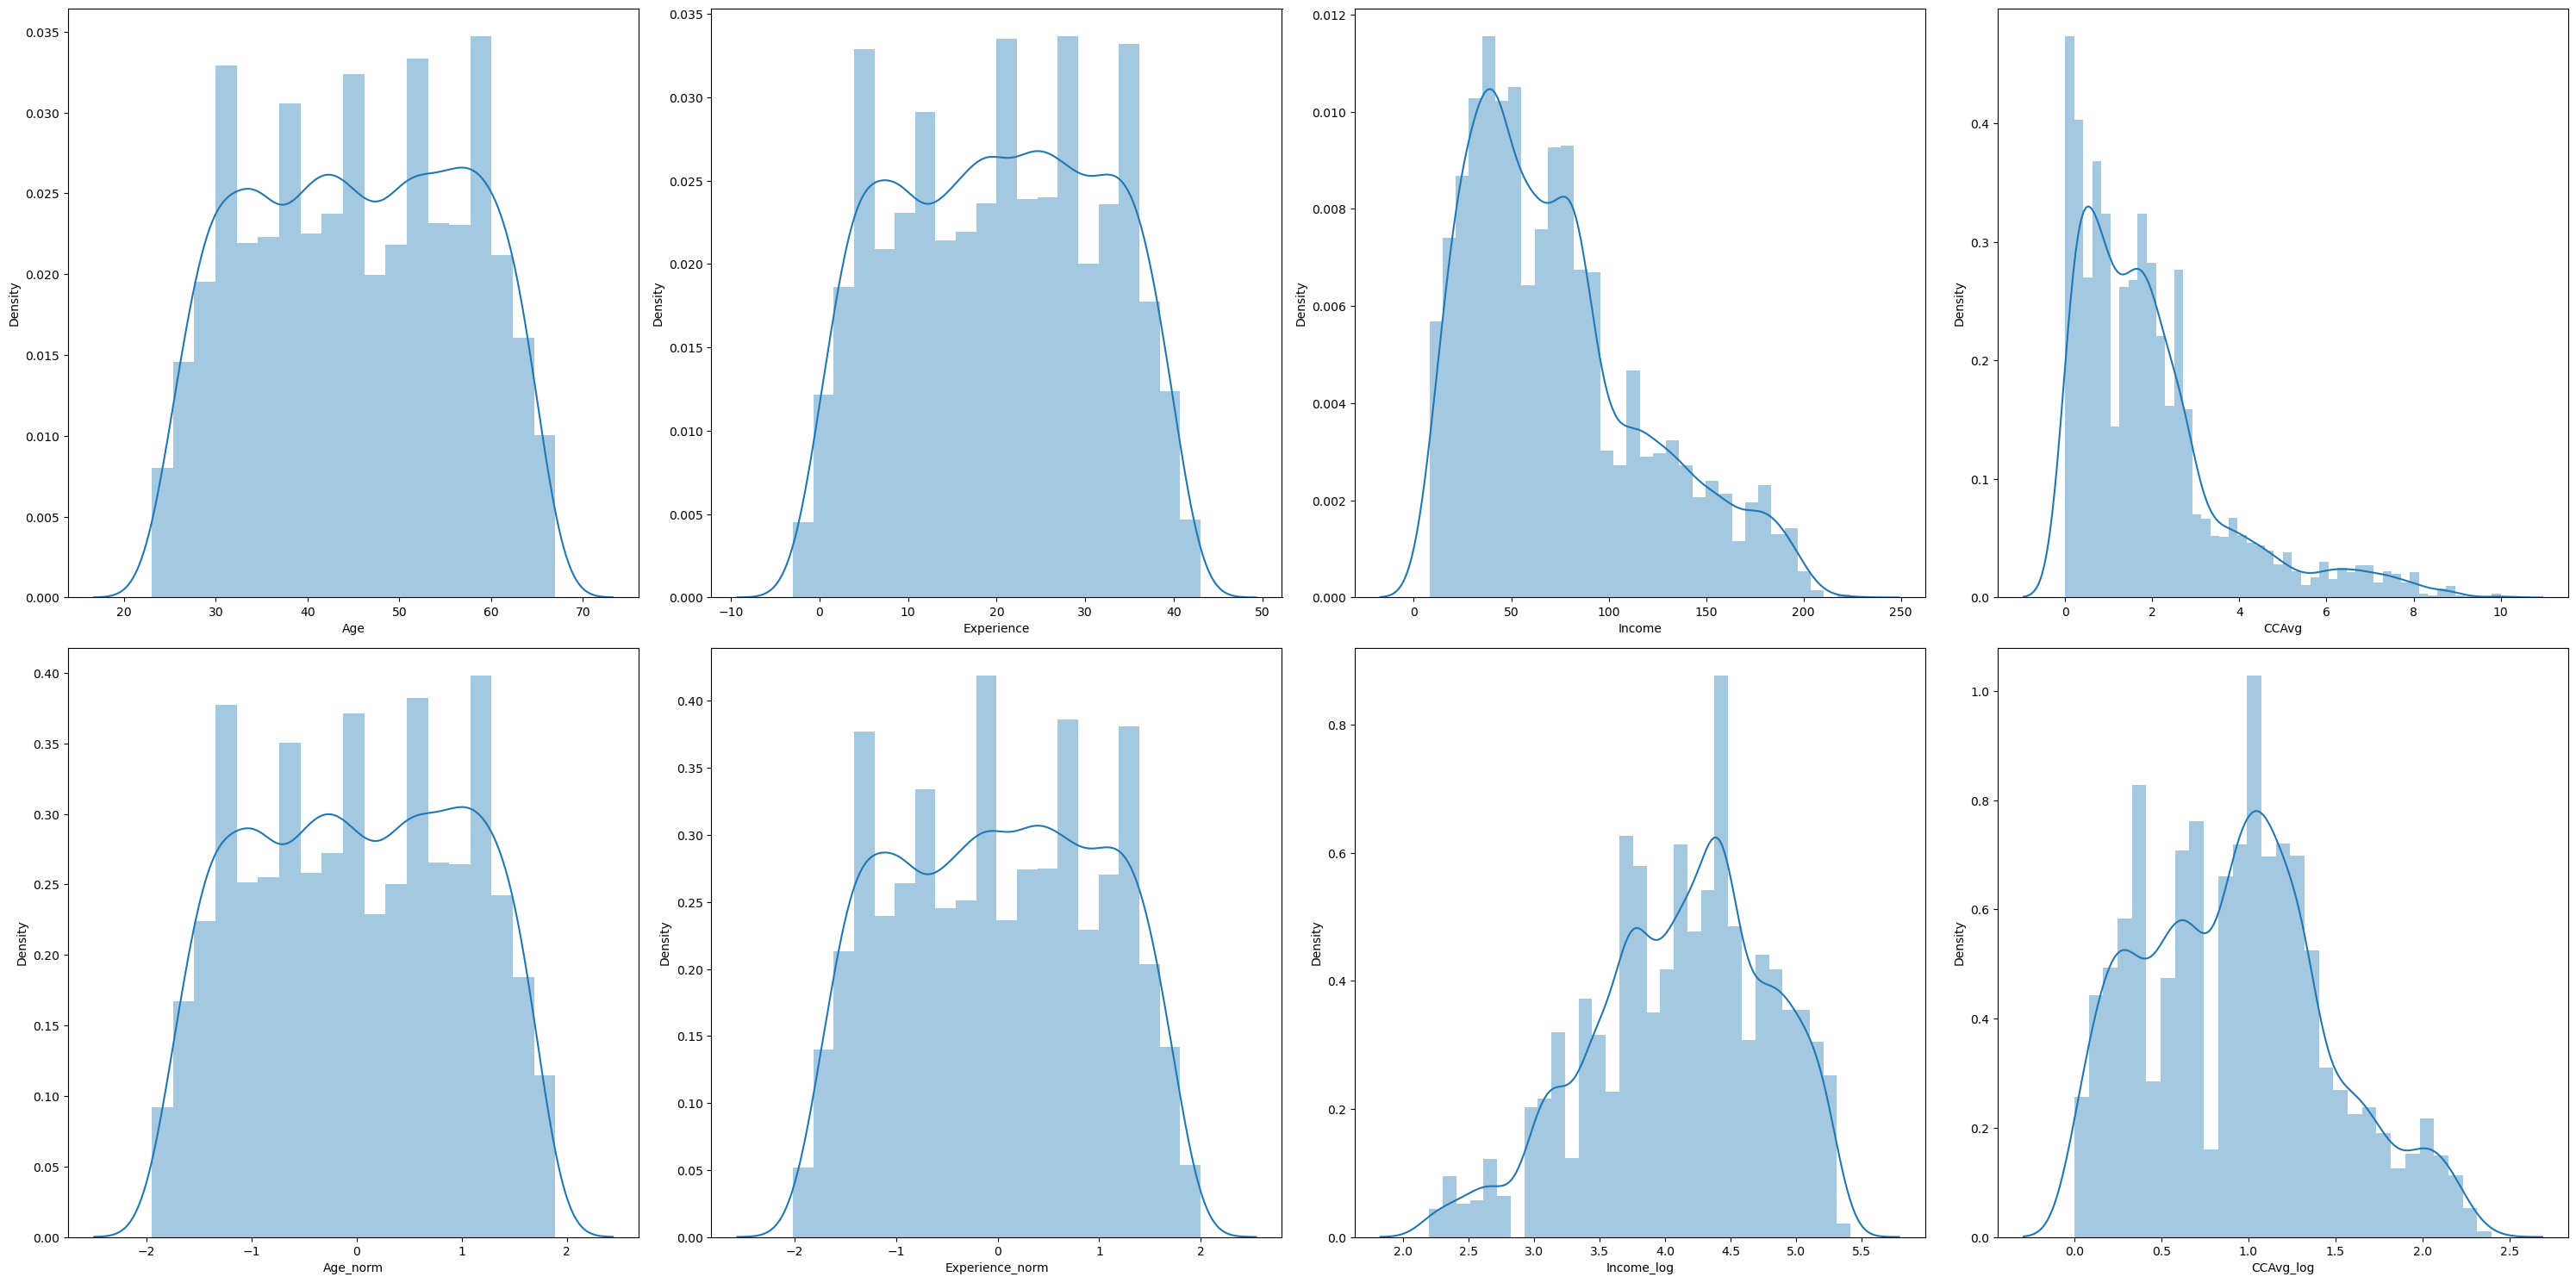

In [323]:
fig, ax=plt.subplots(2,4,figsize=(30,15))
sns.distplot(Loandata['Age'],ax=ax[0,0])
sns.distplot(Loandata['Experience'],ax=ax[0,1])
sns.distplot(Loandata['Income'],ax=ax[0,2])
sns.distplot(Loandata['CCAvg'],ax=ax[0,3])
sns.distplot(Loandata['Age_norm'],ax=ax[1,0])
sns.distplot(Loandata['Experience_norm'],ax=ax[1,1])
sns.distplot(Loandata['Income_log'],ax=ax[1,2])
sns.distplot(Loandata['CCAvg_log'],ax=ax[1,3])
plt.tight_layout()
plt.plot()

In [324]:
features = ['Age', 'Experience', 'Income', 'Family',
            'CCAvg', 'Education', 'Mortgage', 'Securities.Account',
            'Online', 'CreditCard']

target = 'Personal.Loan'


In [325]:
from sklearn.model_selection import train_test_split

X = Loandata[features]
y = Loandata[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [326]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [327]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [328]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[885  10]
 [ 38  67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.87      0.64      0.74       105

    accuracy                           0.95      1000
   macro avg       0.91      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy Score: 0.952


In [329]:
import pandas as pd

coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': logreg.coef_[0]})
print(coeff_df.sort_values(by='Coefficient', ascending=False))


              Feature  Coefficient
2              Income     2.435681
5           Education     1.325937
3              Family     0.824595
1          Experience     0.519044
4               CCAvg     0.187857
7  Securities.Account     0.165330
6            Mortgage     0.112638
8              Online    -0.015920
9          CreditCard    -0.071017
0                 Age    -0.369130


In [330]:
print(Loandata['Personal.Loan'].value_counts())


Personal.Loan
0    4520
1     480
Name: count, dtype: int64


In [331]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [332]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)
logreg.fit(X_train_sm, y_train_sm)


LogisticRegression(class_weight='balanced')

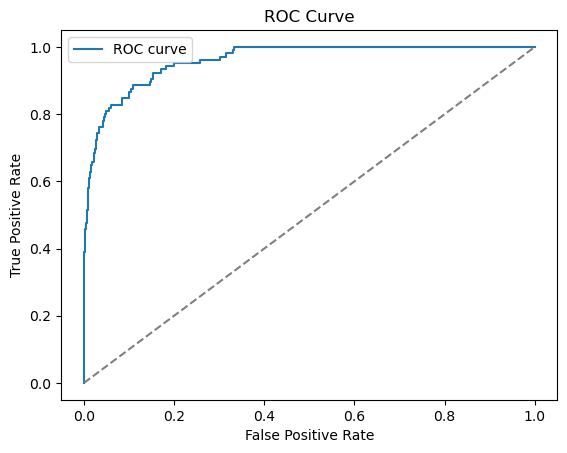

AUC Score: 0.960585262037776


In [333]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_probs))
